In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import nltk
import re
from nltk.corpus import words,stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

In [2]:
data_train = pd.read_csv('train.csv',encoding='unicode_escape')

In [3]:
data_train.head(15)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [4]:
data_train.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [5]:
data_train['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [6]:
data_train.dropna(inplace=True)

In [55]:
stop = stopwords.words('english')
stop+=['im','u']
stop.remove('not')

In [8]:
WNL=WordNetLemmatizer()

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27480 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27480 non-null  object 
 4   Time of Tweet     27480 non-null  object 
 5   Age of User       27480 non-null  object 
 6   Country           27480 non-null  object 
 7   Population -2020  27480 non-null  int64  
 8   Land Area (Km²)   27480 non-null  float64
 9   Density (P/Km²)   27480 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.3+ MB


In [10]:
tt = TweetTokenizer()

In [11]:
def preprocessing(dat):
    pre=[]
    # Remove Leading Blank Spaces
    temp = dat.strip()
    # Lower Case
    temp = temp.lower()
    # Remove URLS 
    temp = re.sub(r"https?://\S+|www\.\S+", "", temp)
    # Character normalization // rahulllllleeeeee -> rahul
    temp = re.sub(r"([a-zA-Z])\1{2,}", r'\1', temp)
    # Remove UserName
    temp = re.sub(r"@\w+", "", temp)
    #removing special characters
    temp=re.sub(r'[^a-zA-Z\s]','',temp)
    #Tweet tokenizer is used for better tokenization since it is a twitter corpus
    temp = tt.tokenize(temp)
    for i in temp:
        if(i not in stop):
            pre += [i]
    return pre,' '.join(pre)

In [56]:
preprocess=[]
corpus = []
vocab = []
for i in data_train['text']:
    x,y = preprocessing(i)
    corpus+=[x]
    vocab+=x
    preprocess+=[y]

In [57]:
data_test = pd.read_csv('test.csv',encoding='unicode_escape')
data_test.dropna(inplace=True)

In [59]:
data_test['sentiment'].value_counts()

neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64

In [60]:
preprocess_test=[]
corpus_test = []
vocab_test = []
for i in data_test['text']:
    x,y = preprocessing(i)
    corpus_test+=[x]
    vocab_test+=x
    preprocess_test+=[y]

In [61]:
data_train['preprocess'] = preprocess
data_test['preprocess']=preprocess_test

x_train = data_train['preprocess']

x_test = data_test['preprocess']


In [62]:
corpus_total = corpus_test+corpus
vocab = set(vocab)

In [63]:
testing_data = preprocessing(data_test['text'][102])
testing_value = data_test['sentiment'][102]

In [64]:
testing_data[1]

'great study time followed delicious japanese meal arty trying get back study mood'

In [65]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(data_train["sentiment"])
y_test = encoder.transform(data_test["sentiment"])

## BOW

### Train DATA

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
CV= CountVectorizer()

In [21]:
count_vector_words_train = CV.fit_transform(data_train['preprocess'])

In [22]:
Countwords_train = dict(zip(CV.get_feature_names_out(), count_vector_words_train.sum(axis=0).A1))
sorted_bag_train = {key: val for key, val in sorted(Countwords_train.items(), key = lambda ele: ele[1], reverse = True)}
top_words_train = dict(list(sorted_bag_train.items())[0: 150])
least_words_train = {key: val for key, val in sorted(Countwords_train.items(), key = lambda ele: ele[1])}

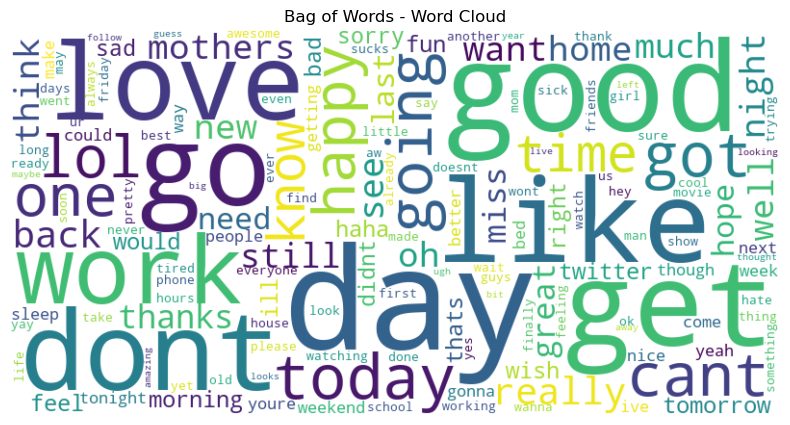

In [23]:
import wordcloud
wordcloud = wordcloud.WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_train)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bag of Words - Word Cloud')
plt.show()

### Test Data

In [24]:
count_vector_words_test = CV.transform(data_test['preprocess'])

In [25]:
Countwords_test = dict(zip(CV.get_feature_names_out(), count_vector_words_test.sum(axis=0).A1))
sorted_bag_test = {key: val for key, val in sorted(Countwords_test.items(), key = lambda ele: ele[1], reverse = True)}
top_words_test = dict(list(sorted_bag_test.items())[0: 150])
least_words_test = {key: val for key, val in sorted(Countwords_test.items(), key = lambda ele: ele[1])}

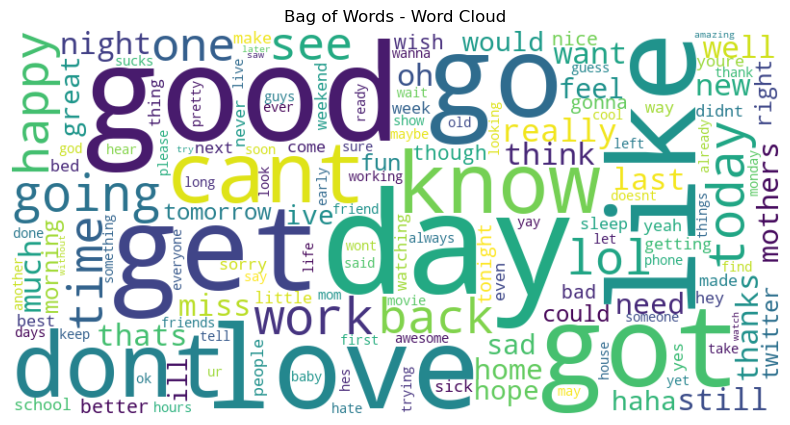

In [26]:
import wordcloud
wordcloud = wordcloud.WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_test)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bag of Words - Word Cloud')
plt.show()

## BOW MODEL - Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(count_vector_words_train,y_train)
y_pred = MNB.predict(count_vector_words_test)
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63      1001
           1       0.60      0.68      0.63      1430
           2       0.72      0.68      0.70      1103

    accuracy                           0.65      3534
   macro avg       0.67      0.65      0.66      3534
weighted avg       0.66      0.65      0.66      3534



### TF - IDF

In [30]:
tf = TfidfVectorizer()

In [31]:
X_train = tf.fit_transform(x_train)
X_test = tf.transform(x_test)

## TF - IDF -> Naive Bayes

In [32]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
y_pred = MNB.predict(X_test)
print(classification_report(y_test,y_pred))
print(MNB.predict(tf.transform([testing_data[1]])))
print(testing_value)

              precision    recall  f1-score   support

           0       0.77      0.44      0.56      1001
           1       0.54      0.81      0.65      1430
           2       0.77      0.58      0.66      1103

    accuracy                           0.63      3534
   macro avg       0.70      0.61      0.62      3534
weighted avg       0.68      0.63      0.63      3534

[2]
positive


## Word To Vec

In [33]:
from gensim.models import Word2Vec

In [34]:
def vov(words,model):
    for word in words:
        if word not in model.wv:
            return False
    else:
        return True

## SKIP GRAM

In [35]:
model1 = Word2Vec(corpus, min_count=1,vector_size=100, window=5,workers=5,sg=1,epochs=100)

In [36]:
train_vec = [model1.wv[x].sum(axis = 0) if len(x) and vov(x,model1) else np.zeros((100)) for x in corpus]
test_vec  = [model1.wv[x].sum(axis = 0) if len(x) and vov(x,model1) else np.zeros((100)) for x in corpus_test]
test_dat  = [model1.wv[x].sum(axis = 0) if len(x) and vov(x,model1) else np.zeros((100)) for x in [testing_data[0]]]

In [37]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(train_vec,y_train)
y_pred = LR.predict(test_vec)
print(classification_report(y_test,y_pred))
print(LR.predict(test_dat))
print(testing_value)

              precision    recall  f1-score   support

           0       0.68      0.28      0.39      1001
           1       0.46      0.83      0.59      1430
           2       0.68      0.33      0.44      1103

    accuracy                           0.52      3534
   macro avg       0.61      0.48      0.48      3534
weighted avg       0.59      0.52      0.49      3534

[2]
positive


### CBOW

In [38]:
model2 = Word2Vec(corpus, min_count=1, vector_size=100,window=5,workers=5,epochs=100)

In [39]:
train_vec = [model2.wv[x].sum(axis = 0) if len(x) and vov(x,model2) else np.zeros((100)) for x in corpus]
test_vec  = [model2.wv[x].sum(axis = 0) if len(x) and vov(x,model2) else np.zeros((100)) for x in corpus_test]
test_dat  = [model2.wv[x].sum(axis = 0) if len(x) and vov(x,model2) else np.zeros((100)) for x in [testing_data[0]]]

In [40]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(train_vec,y_train)
y_pred = LR.predict(test_vec)
print(classification_report(y_test,y_pred))
print(LR.predict(test_dat))
print(testing_value)

              precision    recall  f1-score   support

           0       0.69      0.31      0.43      1001
           1       0.48      0.84      0.61      1430
           2       0.74      0.37      0.50      1103

    accuracy                           0.54      3534
   macro avg       0.64      0.51      0.51      3534
weighted avg       0.62      0.54      0.52      3534

[1]
positive


C:\Users\edith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
import gensim.downloader as api

In [42]:
glove = api.load('glove-twitter-100')

In [43]:
def vov(words,model):
    for word in words:
        if word not in model:
            return False
    else:
        return True

In [44]:
train_vec = [glove[x].sum(axis = 0) if len(x) and vov(x,glove) else np.zeros((100)) for x in corpus]
test_vec  = [glove[x].sum(axis = 0) if len(x) and vov(x,glove) else np.zeros((100)) for x in corpus_test]
test_dat  = [glove[x].sum(axis = 0) if len(x) and vov(x,glove) else np.zeros((100)) for x in [testing_data[0]]]

In [45]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(train_vec,y_train)
y_pred = LR.predict(test_vec)
print(classification_report(y_test,y_pred))
print(LR.predict(test_dat))
print(testing_value)

              precision    recall  f1-score   support

           0       0.70      0.52      0.59      1001
           1       0.56      0.75      0.64      1430
           2       0.73      0.59      0.65      1103

    accuracy                           0.63      3534
   macro avg       0.66      0.62      0.63      3534
weighted avg       0.65      0.63      0.63      3534

[2]
positive


C:\Users\edith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TF-IDF Prediction

In [71]:
text = """What is not to like about this product.
Not bad.
Not an issue.
Not buggy.
Not happy.
Not user-friendly.
Not good.
Is it any good?
I do not dislike horror movies. 
Disliking horror movies is not uncommon. 
Sometimes I really hate the show. 
I love having to wait two months for the next series to come out! 
The final episode was surprising with a terrible twist at the end.
The film was easy to watch but I would not recommend it to my friends. 
I LOL’d at the end of the cake scene."""

In [72]:
input_text = text.split("\n")
input_text = [preprocessing(string)[1] for string in input_text]

In [73]:
input_text

['not like product',
 'not bad',
 'not issue',
 'not buggy',
 'not happy',
 'not userfriendly',
 'not good',
 'good',
 'not dislike horror movies',
 'disliking horror movies not uncommon',
 'sometimes really hate show',
 'love wait two months next series come',
 'final episode surprising terrible twist end',
 'film easy watch would not recommend friends',
 'lold end cake scene']

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()

X_train = tf.fit_transform(x_train)
X_test = tf.transform(input_text)

In [75]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

predict = model.predict(X_test)
predict = encoder.inverse_transform(predict)

In [76]:
for index, text in enumerate(text.split("\n")):
    print(text, " : ", predict[index])

What is not to like about this product.  :  negative
Not bad.  :  negative
Not an issue.  :  negative
Not buggy.  :  neutral
Not happy.  :  positive
Not user-friendly.  :  negative
Not good.  :  positive
Is it any good?  :  positive
I do not dislike horror movies.   :  negative
Disliking horror movies is not uncommon.   :  negative
Sometimes I really hate the show.   :  negative
I love having to wait two months for the next series to come out!   :  positive
The final episode was surprising with a terrible twist at the end.  :  neutral
The film was easy to watch but I would not recommend it to my friends.   :  neutral
I LOL’d at the end of the cake scene.  :  neutral
